In [1]:
# Montamos nuestro Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Seleccionamos la carpeta y verificamos los contenidos
%cd "/content/drive/MyDrive/TC3002B-IA"
!ls

Mounted at /content/drive
/content/drive/MyDrive/TC3002B-IA
model  smile_no_smile_v1.h5


In [2]:
# Importamos las bibliotecas de preprocesado de datos
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

# Directorios de trabajo
base_dir = 'model'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

Found 963 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
(8, 64, 64, 3)
[0. 1. 1. 1. 1. 1. 0. 1.]


<Figure size 640x480 with 0 Axes>

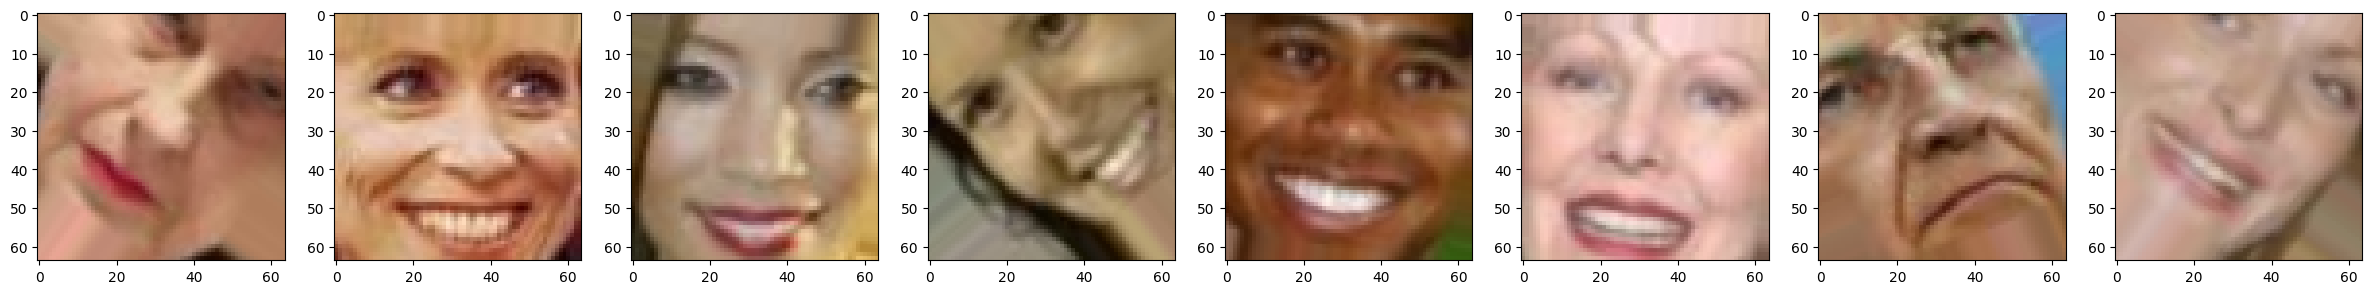

In [98]:
# Data augmentation
train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 40,
						  width_shift_range = 0.1,
						  shear_range = 0.15,
							horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (64, 64),
							batch_size = 8,
							class_mode ='binary',
							)

test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (64, 64),
					batch_size = 20,
					class_mode= 'binary')

val_datagen = ImageDataGenerator(1./255)
val_generator = val_datagen.flow_from_directory(
							validation_dir,
							target_size = (64,64),
							batch_size = 20,
							class_mode= 'binary')

# Muestra la augmentation
images , labels = train_generator[0]

print(images.shape)
print(labels)

plt.figure()
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
  axarr[i].imshow(images[i])

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_110 (Conv2D)         (None, 62, 62, 10)        280       
                                                                 
 max_pooling2d_109 (MaxPool  (None, 31, 31, 10)        0         
 ing2D)                                                          
                                                                 
 conv2d_111 (Conv2D)         (None, 29, 29, 10)        910       
                                                                 
 max_pooling2d_110 (MaxPool  (None, 14, 14, 10)        0         
 ing2D)                                                          
                                                                 
 flatten_64 (Flatten)        (None, 1960)              0         
                                                                 
 dense_126 (Dense)           (None, 64)              

Epoch 1/10
121/121 [==============================] - 8s 56ms/step - loss: 0.6831 - acc: 0.5971
Epoch 2/10
121/121 [==============================] - 7s 57ms/step - loss: 0.5643 - acc: 0.7529
Epoch 3/10
121/121 [==============================] - 8s 70ms/step - loss: 0.4574 - acc: 0.8162
Epoch 4/10
121/121 [==============================] - 7s 57ms/step - loss: 0.4028 - acc: 0.8380
Epoch 5/10
121/121 [==============================] - 8s 65ms/step - loss: 0.3730 - acc: 0.8359
Epoch 6/10
121/121 [==============================] - 8s 68ms/step - loss: 0.3626 - acc: 0.8463
Epoch 7/10
121/121 [==============================] - 7s 56ms/step - loss: 0.3347 - acc: 0.8702
Epoch 8/10
121/121 [==============================] - 8s 70ms/step - loss: 0.3452 - acc: 0.8598
Epoch 9/10
121/121 [==============================] - 7s 56ms/step - loss: 0.3227 - acc: 0.8775
Epoch 10/10
121/121 [==============================] - 8s 69ms/step - loss: 0.3284 - acc: 0.8723


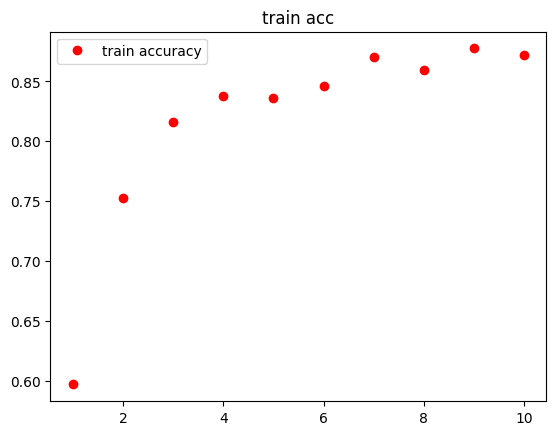

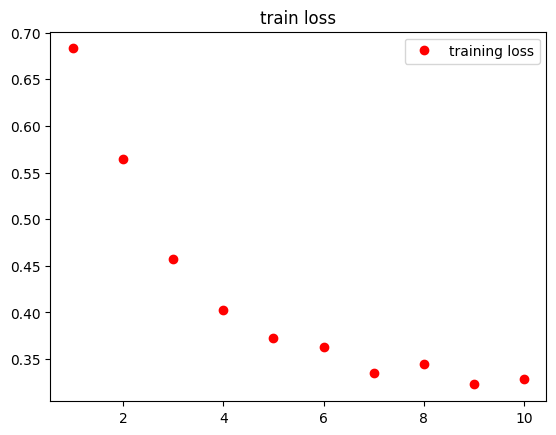

In [101]:
# Creación del modelo
model = models.Sequential()
model.add(layers.Conv2D(10, (3,3), activation="relu", input_shape=(64,64,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(10, (3,3), activation="relu", input_shape=(64,64,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
						optimizer=optimizers.RMSprop(lr=2e-5),
						metrics=['acc'])

history = model.fit(
					train_generator,
					epochs = 10)

acc = history.history['acc']
loss = history.history['loss']

model.save('smile_no_smile_v1.h5')

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'ro',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'ro', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

In [103]:
# Evaluación del modelo
test_loss, test_acc = model.evaluate_generator(test_generator)
print('\ntest acc :\n', test_acc)

# Reporte de resultados
data = {
    'Model': ['V1'],
    'test loss': [test_loss],
    'test accuracy': [test_acc],
    'train loss' : [0.3284],
    'train accuracy' : [0.8723]
}

results = pd.DataFrame(data)

print(results)

<ipython-input-103-9a9299973cd1>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator)
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(



test acc :
 0.7916666865348816
  Model  test loss  test accuracy  train loss  train accuracy
0    V1   51.57906       0.791667      0.3284          0.8723
